# Select good SED in the catalog

In [34]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from astropy.io import fits

%matplotlib inline
from IPython.display import Image, display
from PIL import Image
from scipy.interpolate import interp1d

In [35]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [36]:
index_num=0  # index of counts
index_val=1  # index validity flag
index_temp=2
index_logg=3
index_logz=4
index_spec=5

## Number of good SED to select

In [37]:
NumberOfSEDToSelect=1000

In [38]:
#input_fits='sedgrid_phoenixmodels_good.fits'
#input_fits='sedgrid_phoenixmodels_noextinct.fits'
input_fits='sedgrid_phoenixmodels_all.fits'
output_fits='sedgrid_phoenixmodels_selected1000.fits'

In [39]:
hdul = fits.open(input_fits)

In [40]:
hdul.info()

Filename: sedgrid_phoenixmodels_all.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      23   (8005, 22081)   float64   


In [41]:
hdr=hdul[0].header
hdr

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 8005                                                  
NAXIS2  =                22081                                                  
NBSED   =                22080                                                  
NBWLBIN =                 8000                                                  
WLMIN   =               3000.0                                                  
WLMAX   =              11000.0                                                  
WLBINWDT=                  1.0                                                  
SEDMODEL= 'phoenix '                                                            
TMIN    =               4000.0                                                  
TMAX    =              50000

In [42]:
index_num=hdr["IDX_NUM"]
index_val=hdr["IDX_VAL"]
index_temp=hdr["IDX_TEMP"]
index_logg=hdr["IDX_LOGG"]
index_logz=hdr["IDX_LOGZ"]
index_spec=hdr["IDX_SPEC"]
index_mag=hdr["IDX_MAG"]

# Image

In [43]:
def plot_sedimg(data):
    plt.figure(figsize=(15,10))   
    img=plt.imshow(data[1:,index_spec:],origin='lower',cmap='jet')
    plt.colorbar(img)
    plt.grid(True)
    plt.title('sed grid')
    plt.xlabel('bin number of wavelengths')
    plt.ylabel('sed number')
    plt.show()

In [44]:
def plot_allsed(data):
    plt.figure()   
    
    for idx in np.arange(data.shape[0]-1):
        if data[1+idx,index_val]>0:
            plt.semilogy(data[0,index_spec:],data[1+idx,index_spec:],'-')
    plt.grid(True)
    plt.title('sed')
    plt.xlabel('wavelength (A)')
    plt.ylabel('sed (flam)')
    plt.show()

In [45]:
data = hdul[0].data

# Show all spectra

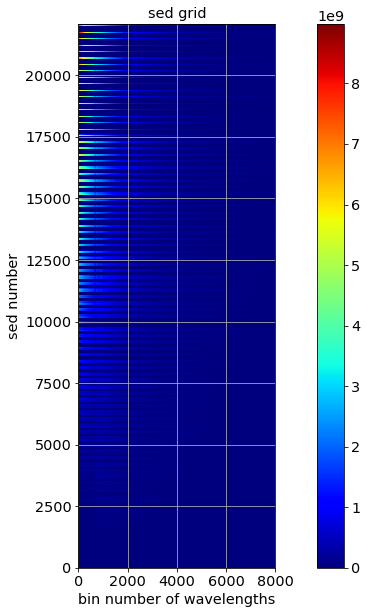

In [ ]:
plot_sedimg(data)

In [ ]:
plot_allsed(data)

# Show wavelength range

In [ ]:
plt.plot(data[0,index_spec:])
plt.grid()
plt.ylabel("$\lambda$")
plt.xlabel("Wavelength index")

# Show good and bad indexes 

## Good indexes

In [ ]:
good_indexes=np.where(data[0:,index_val]>0)[0]

In [ ]:
good_indexes

## Bad indexes

In [ ]:
bad_indexes=np.where(data[0:,index_val]<=0)[0]

# Select good indexes

In [ ]:
good_image=data[good_indexes,:]

In [ ]:
good_image.shape

In [ ]:
plot_sedimg(good_image)

In [ ]:
plot_allsed(good_image)

# Creation of output table

In [ ]:
data_out=np.zeros((NumberOfSEDToSelect+1,data.shape[1]))

In [ ]:
data_out[0,index_spec:]=data[0,index_spec:]

In [ ]:
count=0
while count<NumberOfSEDToSelect:
    ridx=np.random.randint(1,data.shape[0]+1,1)[0]
    if ridx in good_indexes:
        #print ridx
        count+=1
        data_out[count,:]=data[ridx,:]

In [ ]:
plot_sedimg(data_out)

In [ ]:
plot_allsed(data_out)

In [ ]:
plt.hist(data_out[1:,index_temp],bins=100);
plt.grid()
plt.title('temperature distribution for good indexes')
plt.xlabel('temperature')

In [ ]:
plt.hist(data_out[1:,index_logg],bins=20);
plt.grid()
plt.title('Gravity for good indexes')
plt.xlabel('log(G)')

In [ ]:
plt.hist(data_out[1:,index_logg],bins=20);
plt.grid()
plt.title('Metalicity for good indexes')
plt.xlabel('log(Z)')

In [ ]:
hdu = fits.PrimaryHDU(data_out,header=hdul[0].header)
hdu.writeto(output_fits,overwrite=True)